# Training a Restricted Boltzmann Machine (RBM) to reconstruct MNIST images


### Author: Vincenzo Gargano, Assignment 2 - RBM reconstruction on MNIST

Implement from scratch an RBM and apply it to DSET3. The RBM should be implemented fully by you (both CD-1 training and inference steps) but you are free to use library functions for the rest (e.g. image loading and management, etc.).

1.     Train an RBM with a number of hidden neurons selected by you (single layer) on the MNIST data (use the training set split provided by the website).

2.     Use the trained RBM to encode a selection of test images (e.g. using one per digit type) using the corresponding activation of the hidden neurons.

3.     Reconstruct the original test images from their hidden encoding and confront the reconstructions with the original image (use a suitable quantitative metric to assess the reconstraction quality and also choose few examples to confront visually).


# Import libraries and MNNIST dataset

In [30]:
import numpy as np
import gzip
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from RBM import *

from keras.datasets import mnist

# Import MNIST with Keras


In [31]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print("Shapes are respectly train_X, train_y, test_X, test_y ", train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# For dataset that use a small number 
# of equiprobable classe we set the ideal minibatch size to number of classes
minibatch_size = 10

Shapes are respectly train_X, train_y, test_X, test_y  (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [32]:
def binarize_data(data):
    # Taking mnist train_X clump values that are greater than 0 and set them to 1
    # and the rest to 0
    data = (data > 0).astype(int)
    
    return data

In [33]:
# binarizing our dataset
train_X = binarize_data(train_X)
test_X = binarize_data(test_X)

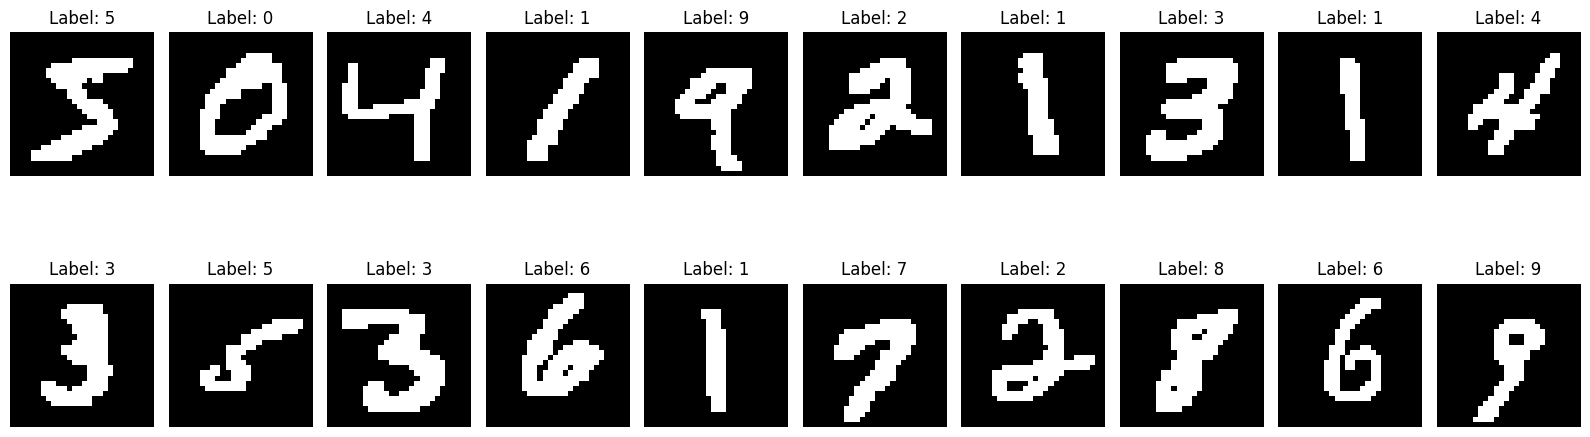

In [34]:
# Show the data

fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(train_X[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title('Label: {}'.format(train_y[i]))
    
plt.tight_layout()

# Basics of RBM

RBMs are bipartite graphs with visible units $v$ and hidden units $h$. The visible units are connected to the hidden units with weights $W_{ij}$, and the hidden units are connected to the visible units with weights $W_{ji}$. The units are binary, and the weights are real-valued. The units are connected by a symmetric matrix $W$.


In [35]:
rbm = RBM(num_visible=784, num_hidden=64, epochs=20, learning_rate=0.1)

In [36]:
def show_data(data, labels):
    """
    Show the data we're going to train.
    """
    
    fix, axes = plt.subplots(2, 10, figsize=(16, 6))
    for i in range(20):
        axes[i//10, i %10].imshow(data[i], cmap='gray');
        axes[i//10, i %10].axis('off')
        axes[i//10, i %10].set_title(f"target: {labels[i]}")
    
    #fix, axes = plt.subplots(2, 10, figsize=(16, 6))
    #for i in range(20):
    #    axes[i//10, i %10].imshow(data[i], cmap='gray');
    #    axes[i//10, i %10].axis('off')
    #    axes[i//10, i %10].set_title(f"target: {labels[i]}")


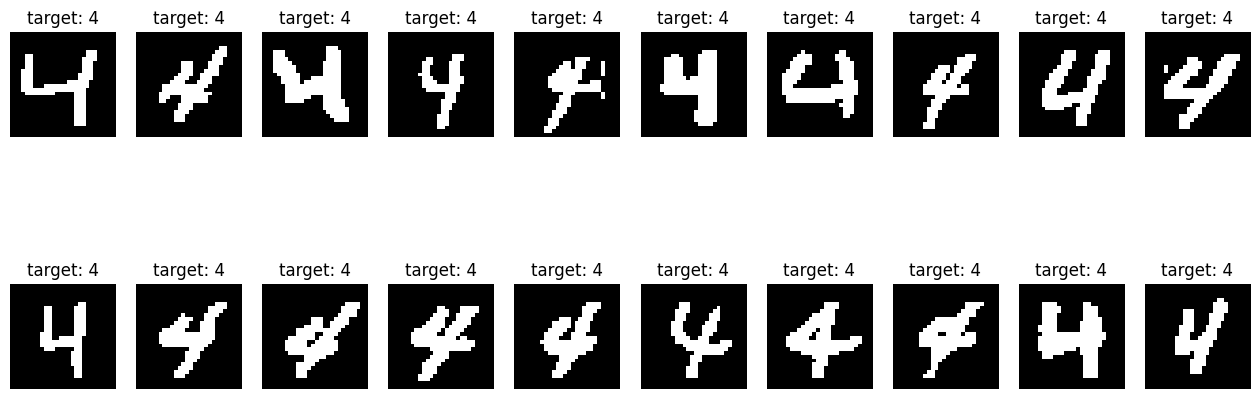

In [37]:
# Given a digit, get all the examples of that digit
digit = 4

train_X_digit = train_X[train_y == digit]
test_X_digit = test_X[test_y == digit]

show_data(train_X_digit, train_y[train_y == digit])


In [38]:

train_X_digit.shape
test_X_digit.shape
# flatten all the examples
train_X_digit = train_X_digit.reshape(train_X_digit.shape[0], -1)
test_X_digit = test_X_digit.reshape(test_X_digit.shape[0], -1)
print("test_X_digit shape: ", test_X_digit.shape)
print("train_X_digit shape: ", train_X_digit.shape)


test_X_digit shape:  (982, 784)
train_X_digit shape:  (5842, 784)


In [39]:
"""
for epoch in range(num_epochs):
    
    np.random.shuffle(train_data)

    for i in range(0, train_data.shape[0], batch_size):
        batch = train_data[i:i+batch_size]
        v0 = batch
        
        # Positive hidden probability
        ph0 = rbm.sigmoid(np.dot(rbm.weights, v0.T).T + b)

        # Sample
        h0 = (np.random.rand(batch_size, num_hidden_units) < ph0).astype('float')
        
        # 
        for j in range(k):
            pv1 = sigmoid(np.dot(h0, W) + a)
            v1 = (np.random.rand(batch_size, num_visible_units) < pv1).astype('float')
            ph1 = sigmoid(np.dot(W, v1.T).T + b)
            h1 = (np.random.rand(batch_size, num_hidden_units) < ph1).astype('float')
            
        pos = np.dot(h0.T, v0)
        neg = np.dot(h1.T, v1)
        W += learning_rate * (pos - neg) / batch_size
        b += learning_rate * np.mean(h0 - h1, axis=0)
        a += learning_rate * np.mean(v0 - v1, axis=0)
"""


"\nfor epoch in range(num_epochs):\n    \n    np.random.shuffle(train_data)\n\n    for i in range(0, train_data.shape[0], batch_size):\n        batch = train_data[i:i+batch_size]\n        v0 = batch\n        \n        # Positive hidden probability\n        ph0 = rbm.sigmoid(np.dot(rbm.weights, v0.T).T + b)\n\n        # Sample\n        h0 = (np.random.rand(batch_size, num_hidden_units) < ph0).astype('float')\n        \n        # \n        for j in range(k):\n            pv1 = sigmoid(np.dot(h0, W) + a)\n            v1 = (np.random.rand(batch_size, num_visible_units) < pv1).astype('float')\n            ph1 = sigmoid(np.dot(W, v1.T).T + b)\n            h1 = (np.random.rand(batch_size, num_hidden_units) < ph1).astype('float')\n            \n        pos = np.dot(h0.T, v0)\n        neg = np.dot(h1.T, v1)\n        W += learning_rate * (pos - neg) / batch_size\n        b += learning_rate * np.mean(h0 - h1, axis=0)\n        a += learning_rate * np.mean(v0 - v1, axis=0)\n"

In [40]:
# take 1 random sample from train_X_zeros

errors = []
error = []
reconstructed_images = []
original_images = []

data_size = 1500

CD_1 = True

for i in range(rbm.epochs):

    #Take first data_size examples
    training_set = train_X_digit[:data_size]
    
    print("Epoch ", i)
    
    if not CD_1:
        
        for data in range(training_set.shape[0]):
            
            current_data = training_set[np.random.choice(training_set.shape[0], 1, replace=False)]
            # Instead of picking it randomly, we pick it sequentially
            
            #sequentially
            #current_data = training_set[data]
            # Try to do the CD-1 directly here to debug faster.

            # Positive divergence
            #positive_hi_prob = rbm.sigmoid(np.dot(rbm.weights, current_data.T).T + rbm.hidden_bias)
            positive_hi_prob = rbm.sigmoid(np.dot(current_data, rbm.weights.T) + rbm.hidden_bias)
            # Use none to make matrix mul work
            #wake_phase = np.dot(positive_hi_prob[:, None], current_data[None, :].T)
            
            
            wake_phase = np.dot(positive_hi_prob.T, current_data)         

            #wake_phase = np.dot(positive_hi_prob, current_data.T)

            probs_hidden = np.array(positive_hi_prob)

            # Sample binary hidden unit activations from Bernoulli distribution
            hidden_units_sample = (np.random.rand(*probs_hidden.shape) < probs_hidden).astype(float)
            
            # Update probabilities based on binary activations
            
            # Negative diverence

            # Doing gibbs sampling here for 1 step
            # Sample binary visible units from positive probabilities
            # In gibbs sampling we evaluate pv1: the probability of the visible units given the hidden units
            # then v1: the sample of the visible units given the hidden units, then again
            # ph1: the probability of the hidden units given the visible units and finally, 
            # h1: the sample of the hidden units given the visible units. The reconstruction is given by v1.
            pv1 = rbm.sigmoid(np.dot(hidden_units_sample, rbm.weights) + rbm.visible_bias)
            v1 = (np.random.rand(rbm.num_visible) < pv1).astype('float')
            ph1 = rbm.sigmoid(np.dot(v1, rbm.weights.T) + rbm.hidden_bias)
            h1 = (np.random.rand(rbm.num_hidden) < ph1).astype('float')
            
            dream = np.dot(h1.T, v1)
            
            reconstruction_error = np.sum((current_data - v1) ** 2)
            # for mep error
            #reconstruction_error = np.abs(current_data - v1)
            
            # make v1 of shape (784,) v1 is shape (1, 784)
            reshaped_v1= v1.reshape(rbm.num_visible,)
            reshaped_current_data = current_data.reshape(rbm.num_visible,) 
            reshaped_positive_hi_prob = positive_hi_prob.reshape(rbm.num_hidden,)
            reshaped_h1 = h1.reshape(rbm.num_hidden,)
            
            
            # update
            rbm.weights += rbm.learning_rate * (wake_phase - dream)
            rbm.visible_bias += rbm.learning_rate * (reshaped_current_data - reshaped_v1)
            rbm.hidden_bias += rbm.learning_rate * (reshaped_positive_hi_prob - reshaped_h1)
            
            
            

            """
            probs_hidden = hidden_units_sample
 
            # Negative divergence
            # Sample binary hidden units from positive probabilities

            neg_hidden_probs = probs_hidden
            neg_hidden_units = (np.random.rand(*neg_hidden_probs.shape) < neg_hidden_probs).astype(float)

            # Compute reconstruction probabilities
            recon_probs = rbm.sigmoid(np.dot(neg_hidden_units, rbm.weights) + rbm.visible_bias)

            # This is equation 8 in the Hinton paper: sample visible
            #recon_data_prob = rbm.sigmoid(
            #    (probs_hidden.dot((rbm.weights))) + rbm.visible_bias)
    
            #sample hidden here
            #neg_hi_probs = rbm.sigmoid(np.dot(recon_data_prob, (rbm.weights.T)) + rbm.hidden_bias)
            
            dream = np.dot(neg_hidden_probs.T, recon_probs)

            reconstruction_error = rbm.update(wake=wake_phase, dream=dream, negative=neg_hidden_probs, positive=probs_hidden, data=current_data, recon_data=recon_probs)
            """
            
            errors.append(reconstruction_error)            
        
        error.append(np.mean(errors))
            
        # reconstructed a random image from training_set
        # take a random sample from training_set and reconstruct it
        sample = training_set[np.random.choice(training_set.shape[0], 1, replace=False)]

        # To reconstruct the image we need to sample the hidden units from the visible units
        """
        probs_hidden = rbm.sigmoid(np.dot(sample, rbm.weights.T) + rbm.hidden_bias)
        recon_probs = rbm.sigmoid(np.dot(probs_hidden, rbm.weights) + rbm.visible_bias)
        
        reconstructed = recon_probs 
        # apply threshold to the probabilities
        """
        
        reconstructed = rbm.reconstruct_data(sample)
                    
        reconstructed_images.append(reconstructed)

        
        
        #reconstructed_images.append(rbm.reconstruct(data=sample, hidden=probs_hidden, prob_visible=recon_probs))
        #reconstructed_images.append(rbm.reconstruct_data(data=sample))
    
        original_images.append(current_data)

    
    else:
        
        for data in range(training_set.shape[0]):
            
            current_data = training_set[data]
            
            current_data = current_data.reshape(1, rbm.num_visible)
            
            wake_phase, dream, reconstruction_error, v1, current_data, positive_hi_prob, h1 = rbm.contrastive_divergence_1(current_data)
   
            rbm.update(wake=wake_phase, dream=dream, positive=positive_hi_prob, negative=h1, data=current_data, recon_data=v1) 
        
            # make recon error an np.array list
            reconstruction_error_list = np.array(reconstruction_error)
            
            # append epochs_error of rbm they are numpy arrays
            rbm.epochs_error = np.append(rbm.epochs_error, reconstruction_error) 
            
            #rbm.epochs_error_list.append(reconstruction_error)

        rbm.error_history = np.append(rbm.error_history, np.mean(rbm.epochs_error))
         

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Epoch  11
Epoch  12
Epoch  13
Epoch  14
Epoch  15
Epoch  16
Epoch  17
Epoch  18
Epoch  19


In [54]:
def show_reconstructed_images_changed(digit, num_images):
    # Trying to reconstruct digits that are not 2 from training on twos 
    
    images = train_X[train_y==digit]

    # Sampling images from all
    sample_indices = np.random.choice(images.shape[0], num_images, replace=False)
    samples_to_recon = images[sample_indices]
    samples_to_recon = samples_to_recon.reshape(num_images, -1)
    reconstructed = rbm.reconstruct_data(samples_to_recon)
    
    fig, axes = plt.subplots(2, num_images, figsize=(16, num_images))
    
    for i in range(num_images):
        axes[0][i].imshow(samples_to_recon[i].reshape(28, 28), cmap='gray');
        axes[0][i].axis('off')
        axes[0][i].set_title(f"Original {i+1}")
        
        axes[1][i].imshow(reconstructed[i].reshape(28, 28), cmap='gray');
        axes[1][i].axis('off')
        axes[1][i].set_title(f"Reconstructed {i+1}")
        
def show_reconstructed_history(num_images = 5):
    # Show from the frist epoch reconstructed to the num_images epoch
    
    num_of_recon_img_column = (len(reconstructed_images)//num_images)
    
    fix, axes = plt.subplots(num_of_recon_img_column, num_images, figsize=(15, 15))
    
    for i in range(num_of_recon_img_column):
        for j in range(num_images):
            axes[i, j].imshow(reconstructed_images[i*num_images+j].reshape(28, 28), cmap='gray', interpolation='nearest');
            axes[i, j].axis('off')
            axes[i, j].set_title(f"img: {i*num_images+j}")
    

def plot_reconstruction_error(error):
    
    print(error.shape) 
    plt.plot(error)
    plt.xlabel("Epoch")
    plt.ylabel("Reconstruction Error")
    plt.title("Reconstruction Error over Epochs")
    plt.show()


def visualize_weights():

    if np.sqrt(rbm.weights.shape[0]) % 1 == 0:
        x_len = int(np.sqrt(rbm.weights.shape[0]))
        y_len = int(np.sqrt(rbm.weights.shape[0]))  
    else:
        x_len = 8
        y_len = rbm.weights.shape[0]//x_len        

    fig, axes = plt.subplots(x_len, y_len, figsize=(10, 10))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(rbm.weights[i].reshape(28, 28), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
     

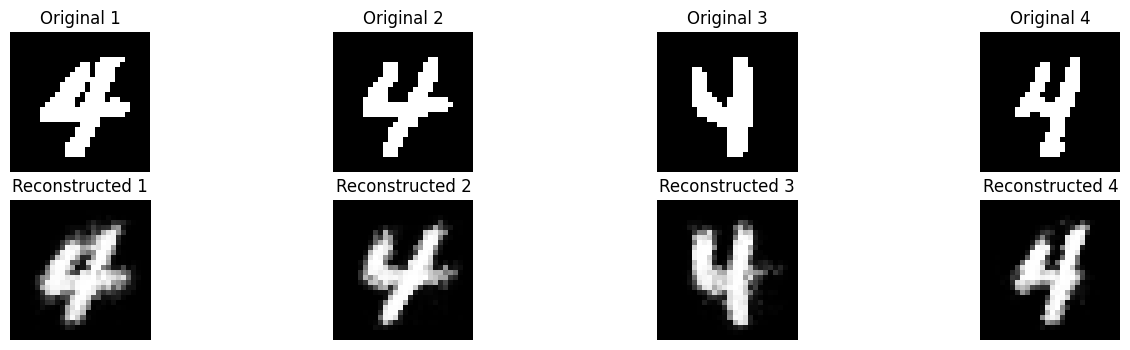

In [55]:
# From iteration zero to iteration 10
#show_reconstructed_images(num_images=10)
show_reconstructed_images_changed(digit=4, num_images=4)

In [56]:
#show_reconstructed_history()

(20,)


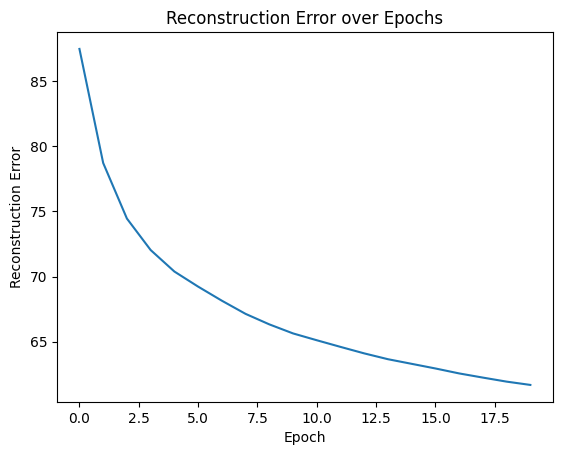

In [57]:
plot_reconstruction_error(rbm.error_history)


In [45]:
# again binarizing reconstructed images
def binarize_reconstructed(reconstructed_images, threshold=0.5):
    binarized_reconstructed_images = []

    for reconstructed in reconstructed_images:
        reconstructed[reconstructed > threshold] = 1
        reconstructed[reconstructed < threshold] = 0
        binarized_reconstructed_images.append(reconstructed)

    return binarized_reconstructed_images 

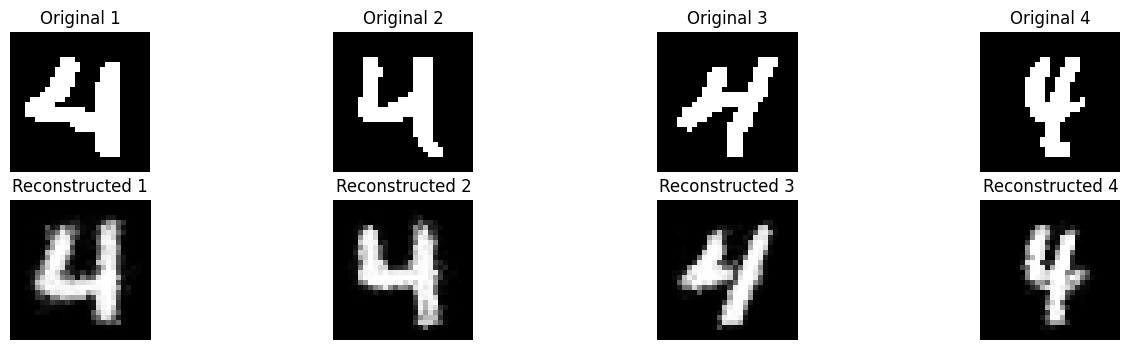

In [46]:
binarized_images = binarize_reconstructed(reconstructed_images)

# Show the data
show_reconstructed_images_changed(digit=4, num_images=4)

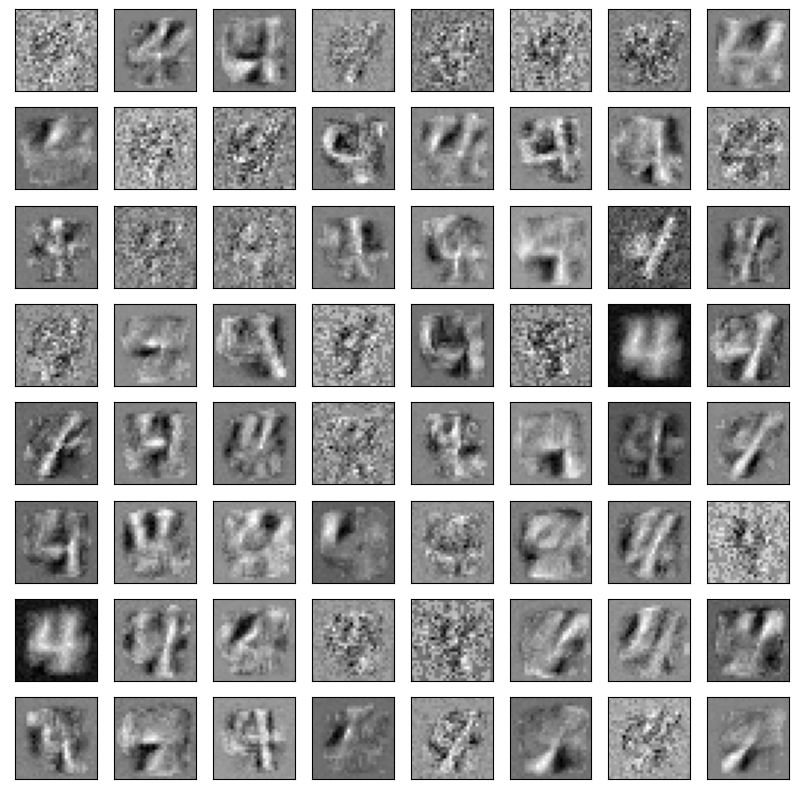

In [47]:
visualize_weights()

In [48]:
# Trying to reconstruct digits that are not 2 from training on twos 
digit = 2
images = train_X[train_y==digit]


# Sampling a image from all
sample_to_recon = images[np.random.choice(images.shape[0], 1, replace=False)]
sample_to_recon = sample_to_recon.reshape(1, -1)
reconstructed = rbm.reconstruct_data(sample_to_recon)

In [49]:
def show_reconstruction(digit):
    # Trying to reconstruct digits that are not 2 from training on twos 
    
    images = train_X[train_y==digit]


    # Sampling a image from all
    sample_to_recon = images[np.random.choice(images.shape[0], 1, replace=False)]
    sample_to_recon = sample_to_recon.reshape(1, -1)
    reconstructed = rbm.reconstruct_data(sample_to_recon)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    axes[0].imshow(sample_to_recon.reshape(28, 28), cmap='gray');
    axes[0].axis('off')
    axes[0].set_title(f"Original")
    
    axes[1].imshow(reconstructed.reshape(28, 28), cmap='gray');
    axes[1].axis('off')
    axes[1].set_title(f"Reconstructed")
    

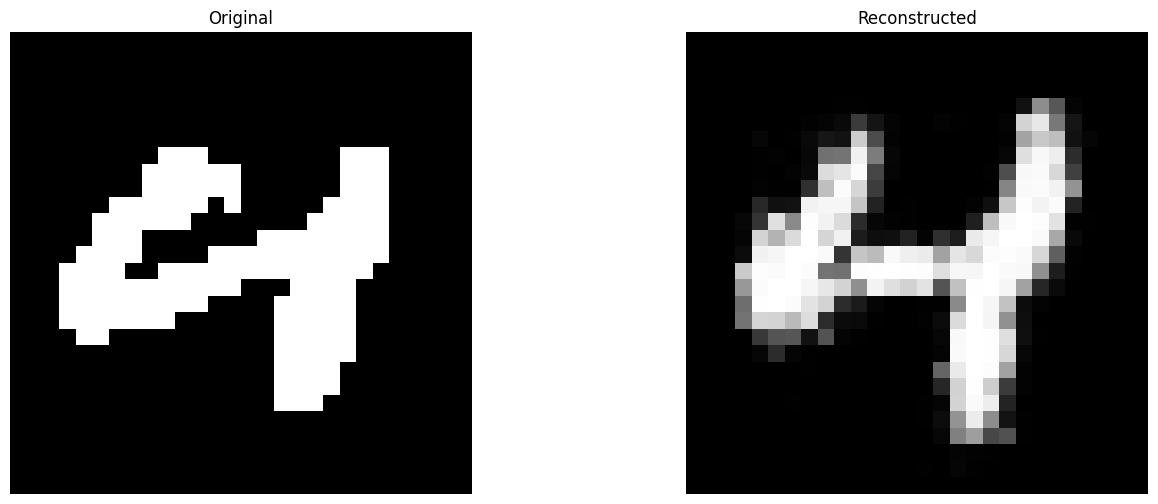

In [50]:
show_reconstruction(digit = 4)

# Reconstruction evaluation of RBM

To evaluate the reconstruction quality we can use different techniques like MSE, PSNR, SSIM[], etc. In this case we will use the MSE (Mean Squared Error) and the SSIM (Structural Similarity Index Measure). The MSE is defined as: 

$$MSE = \frac{1}{N}\sum_{i=1}^{N} (x_i - y_i)^2$$

where $x$ is the original image and $y$ is the reconstructed image. The SSIM is defined as:

$$
SSIM = \frac{(2\mu_x\mu_y + C_1)(2\sigma_{xy} + C_2)}{(\mu_x^2 + \mu_y^2 + C_1)(\sigma_x^2 + \sigma_y^2 + C_2)}
$$

the parameters $\mu_x, \mu_y$ and $\sigma_x, \sigma_y$ are the mean and standard deviation of the original and reconstructed images, respectively. The parameters $\sigma_{xy}$ and $\sigma_{yx}$ are the covariance between the original and reconstructed images. The parameters $C_1$ and $C_2$ are constants that are used to stabilize the division by zero.

Or we can use MEP (Maximum Error Percentage) defined as:

$$MEP = \frac{1}{N}\sum_{i=1}^{N} \frac{max(x_i - y_i)}{x_i}$$

where $x$ is the original image and $y$ is the reconstructed image.




In [51]:
from sklearn.metrics import accuracy_score, classification_report, recall_score
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error



In [52]:
def rbm_evaluation(num_images=10,threshold=0.6):
    SHOW = False
    """ 
    Using sklearn.metric we will see how much two images reconstructed are similar by looking at each pixel if is 1-0 comparing images
    So we will reconstruct then show only the ones in the images that are activated for a threshold value like 0.5 or 0.6.
    
    returns: prints evaluation metrics for the RBM
    """

    accuracy_score_list = []
    recall_score_list = []
    ssim_score_list = []
    mean_squared_error_list = []
    
    recons = []
    
    to_recons = test_X_digit[np.random.choice(test_X_digit.shape[0], num_images, replace=False)]
 
    for data in to_recons:
        recons.append(rbm.reconstruct_data(data))    
        
    # Binarize reconstructed images
    binarized_recons = binarize_reconstructed(recons, threshold=threshold)
    
    # Show the data
    if SHOW:

        for i in range(num_images):
            fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
            axes[0].imshow(to_recons[i].reshape(28, 28), cmap='gray');
            axes[0].axis('off')
            axes[0].set_title(f"Original")
    
            axes[1].imshow(binarized_recons[i].reshape(28, 28), cmap='gray');
            axes[1].axis('off')
            axes[1].set_title(f"Reconstructed")

      
    recons = np.array(recons).reshape(-1, 28*28)
    to_recons = np.array(to_recons).reshape(-1, 28*28)
    
    # Evaluation metrics
    for i in range(num_images):
        accuracy_score_list.append(accuracy_score(to_recons[i], binarized_recons[i]))
        recall_score_list.append(recall_score(to_recons[i], binarized_recons[i]))
        ssim_score_list.append(ssim(to_recons[i], binarized_recons[i], data_range=1))
        mean_squared_error_list.append(mean_squared_error(to_recons[i], binarized_recons[i]))
    
    print(f"Accuracy Score: {np.mean(accuracy_score_list)}")
    print(f"Recall Score: {np.mean(recall_score_list)}")
    print(f"SSIM Score: {np.mean(ssim_score_list)}")
    print(f"Mean Squared Error: {np.mean(mean_squared_error_list)}")
    
    
    
    

# Parameter of reconstruction

After the reconstruct we set a parameter threshold to evaluate the reconstruction on a binarized image and then we evaluate how much is good. Depending on the parameter we can have bigger accuracy score or bigger recall score, we will also see the

In [53]:
rbm_evaluation(num_images=test_X_digit.shape[0], threshold=0.5)

Accuracy Score: 0.9414356373914127
Recall Score: 0.8222897745389665
SSIM Score: 0.8314139336252679
Mean Squared Error: 0.058564362608587224
